In [65]:
# Imports e funções 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

MAIN_FOLDER_PATH = "D:\\98_phD_Files\\Projeto 008 - Classificador entre K rotas MSCL Combinado\\src-java\\data\\"

def getResultsDataFrame(dataDict: dict) -> pd.DataFrame:
    PATH: str = f"{MAIN_FOLDER_PATH}{dataDict['Folder']}\\results.txt"

    return pd.read_csv(PATH, sep=';')

def getMeanSameNetworkLoad(dataFrame: pd.DataFrame) -> pd.DataFrame:

    columns = ['networkLoad','probabilityBlocking', 'executionTime', 'MSCLCycle']

    dataFrameClean = dataFrame[columns]

    return dataFrameClean.groupby('networkLoad').mean()

def plotResults(datas: list, type: str, axis) -> None:

    for result in datas:
        df_mean = getMeanSameNetworkLoad(getResultsDataFrame(result))

        axis.plot(df_mean.index, df_mean[type], color=result['Color'], linestyle=result['Line'], marker=result['Mark'], label=result['Label'])
        

    if type == "probabilityBlocking":

        axis.set_yscale('log')
        axis.set_ylabel("Probabilidade de Bloqueio")
        axis.set_xlabel("Carga da Rede (Erlangs)")
        axis.set_title("Probabilidade de Bloqueio x Carga da Rede")
        axis.grid(axis='both', which='both')

        plt.yticks([1e-1, 1e-2, 1e-3, 1e-4], [r'$10^{-1}$', r'$10^{-2}$', r'$10^{-3}$', r'$10^{-4}$'])

        # Uma única legenda para todos os gráficos centralizada na parte superior da figura
        axis.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), fancybox=True, shadow=False, ncol=3, fontsize=12)
        
    elif type == "executionTime":
        
        axis.set_ylabel("Tempo de Execução (ms)")
        axis.set_xlabel("Carga da Rede (Erlangs)")
        axis.set_title("Tempo de Execução x Carga da Rede")
        axis.grid(axis='both', which='both')


    

    #ax.legend(loc='upper center', bbox_to_anchor=(1.025, 1.28), fancybox=True, shadow=False, ncol=3, fontsize=12)
    

    # plt.grid(axis='y', which='both')

    # if not doubleFig:
    #     plt.show()
    #     plt.close(fig)

MARKER: dict = {
    "k=1": "o",
    "k=2": "s",
    "k=3": "d",
    "k=4": "p",
    "k=5": "h",
}

LINES: dict = {
    "RSA" : ":",
    "MSCLS" : "-.",
    "MSCLC" : "--",
    "SAR" : "-",
}

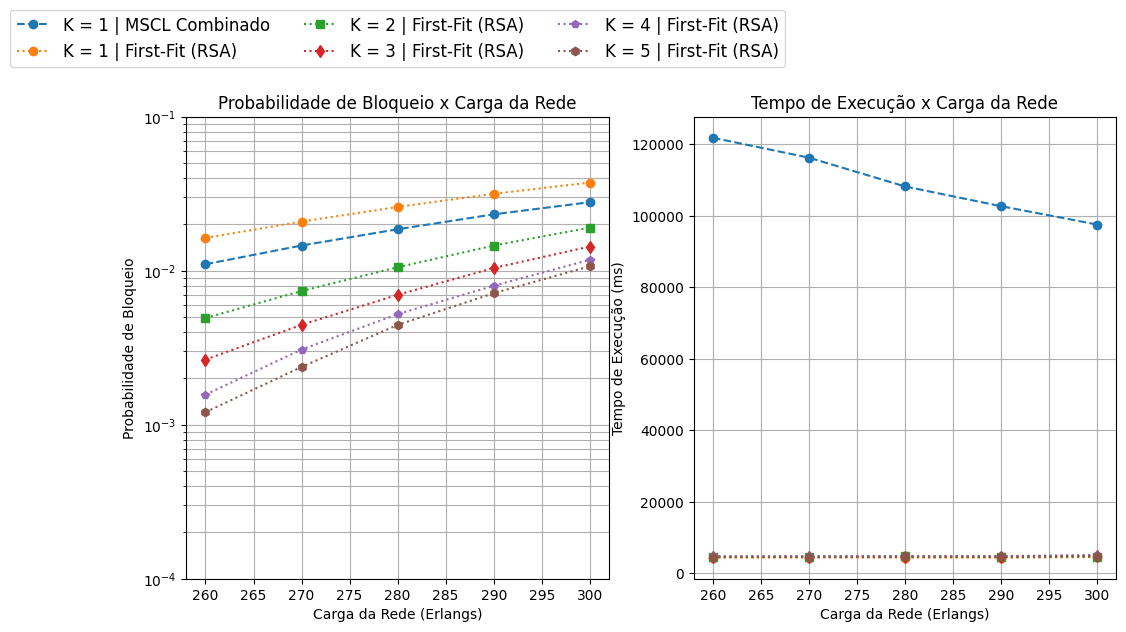

In [66]:
DATA_NSFNet: list = [
    {
        "Folder": "2024-02-01_13-39-54_NSFNet_MSCLSequencial_MSCL_None_ITwoCollectData_DONE",
        "Obs": "K = 1 | MSCL Combinado",
        "Label": "K = 1 | MSCL Combinado", "Color": None, "Mark": MARKER['k=1'], "Line": LINES['MSCLC'],
    },
    {
        "Folder": "2024-02-01_13-59-24_NSFNet_YEN_FirstFit_Routing_SA_ITwoCollectData_DONE",
        "Obs": "K = 1 | First-Fit (RSA)",
        "Label": "K = 1 | First-Fit (RSA)", "Color": None, "Mark": MARKER['k=1'], "Line": LINES['RSA'],
    },

    {
        "Folder": "2024-02-01_14-01-50_NSFNet_YEN_FirstFit_Routing_SA_ITwoCollectData_DONE",
        "Obs": "K = 2 | First-Fit (RSA)",
        "Label": "K = 2 | First-Fit (RSA)", "Color": None, "Mark": MARKER['k=2'], "Line": LINES['RSA'],
    },

    {
        "Folder": "2024-02-01_14-02-50_NSFNet_YEN_FirstFit_Routing_SA_ITwoCollectData_DONE",
        "Obs": "K = 3 | First-Fit (RSA)",
        "Label": "K = 3 | First-Fit (RSA)", "Color": None, "Mark": MARKER['k=3'], "Line": LINES['RSA'],
    },

    {
        "Folder": "2024-02-01_14-03-22_NSFNet_YEN_FirstFit_Routing_SA_ITwoCollectData_DONE",
        "Obs": "K = 4 | First-Fit (RSA)",
        "Label": "K = 4 | First-Fit (RSA)", "Color": None, "Mark": MARKER['k=4'], "Line": LINES['RSA'],
    },
    
    {
        "Folder": "2024-02-01_14-04-27_NSFNet_YEN_FirstFit_Routing_SA_ITwoCollectData_DONE",
        "Obs": "K = 5 | First-Fit (RSA)",
        "Label": "K = 5 | First-Fit (RSA)", "Color": None, "Mark": MARKER['k=5'], "Line": LINES['RSA'],
    },
]

# Gráfico de probabilidade de Bloqueio para NSFNet

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Sem ordenar
plt.subplot(1,2,1) # Linhas, colunas, número do plot

plotResults(DATA_NSFNet, 'probabilityBlocking', axis=ax[0])

plotResults(DATA_NSFNet, 'executionTime', axis=ax[1])

plt.show()


In [16]:
getMeanSameNetworkLoad(getResultsDataFrame(DATA_NSFNet[0]))

,probabilityBlocking,executionTime,MSCLCycle
networkLoad,,,
240.0,0.005523,138095.0,0.0
252.0,0.008536,128658.0,0.0
264.0,0.012193,119510.0,0.0
276.0,0.016880,111525.0,0.0
288.0,0.022263,104655.0,0.0
300.0,0.027862,100191.0,0.0
